In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import time
from sklearn.datasets._samples_generator import make_blobs

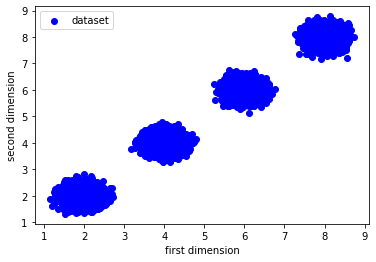

(40000, 16)


In [22]:
# initiate dataset
dimensions = 12
clusters = [[2]*dimensions]
clusters.append([4]*dimensions)
clusters.append([6]*dimensions)
clusters.append([8]*dimensions)
number = 40000
standard = [0.2, 0.2, 0.2, 0.2]
X, _ = make_blobs(n_samples=number, n_features=dimensions, centers=clusters, cluster_std=standard)
plt.scatter(X[:, 0], X[:, 1], c="blue", marker='o', label='dataset')
plt.xlabel('first dimension')  
plt.ylabel('second dimension')  
plt.legend(loc=2) 
plt.show()
print(X.shape)

In [21]:
# load X and C from file
Y = np.loadtxt("../kmeans/data/dataset_40k_points_16d_4C")
print(Y.shape)
X = np.asarray(Y[:40000])
C = np.asarray(Y[40000:])
print(X.shape)
print(C.shape)

(40004, 16)
(40000, 16)
(4, 16)


In [15]:
print(X)

[[3.762564 3.681719 3.888144 ... 4.174225 3.774484 4.105799]
 [3.903727 3.742826 3.949958 ... 4.007706 4.20116  3.989289]
 [7.800015 8.022355 8.015166 ... 7.797318 8.44604  7.706218]
 ...
 [2.308638 2.029477 2.40873  ... 2.168699 2.219187 2.149772]
 [2.282267 2.035695 1.491918 ... 1.989169 2.238774 1.954192]
 [4.106234 4.367011 4.087432 ... 4.336789 3.912844 3.956184]]


In [23]:
# initiate centers
c_dimens = dimensions
c = [[1]*c_dimens]
c.append([3]*c_dimens)
c.append([5]*c_dimens)
c.append([7]*c_dimens)
C, _ = make_blobs(n_samples=4, n_features=c_dimens, centers=c, cluster_std=standard)
print(C)

[[1.23358146 1.23858015 1.0309654  0.73561396 0.7834181  1.11070596
  1.18497157 1.02009206 0.9449458  1.1393752  1.23097915 1.02475251
  1.20503768 0.95734525 0.72694928 1.10150568]
 [4.93443865 4.66201825 4.68030684 4.96957458 5.00538595 5.01795965
  4.9448467  5.00904755 4.96818415 5.1544287  5.23002447 4.88112911
  5.08960172 5.31353211 5.07186176 4.98796198]
 [3.11881225 3.38853545 2.5117512  3.49334487 3.22183533 3.12476647
  3.00768887 3.11438747 2.87185386 2.57605586 2.79882136 2.90176104
  3.1331857  3.21328385 3.27403411 3.13673171]
 [7.29591415 6.98019488 7.34934629 6.86947021 7.39490022 6.87489329
  6.74280866 6.81410058 7.08874103 7.21356239 6.88058761 7.00605131
  7.10359071 7.139883   6.93953702 7.1582374 ]]


In [4]:
# store X and centers into one file
Total = np.asarray(X)
Total = np.append(Total, C, axis=0)
Total = np.round(Total, decimals=6)
np.savetxt("dataset_40k_points_320d_4C", Total, delimiter=' ', fmt='%f')

In [17]:
# run baseline
k = 4       # number of centers
iter = 3   # number of iteration
number = 40000
dimensions = 16
start_time = time.time()
estimator = KMeans(n_clusters=k, init=C, n_init = 1, max_iter=iter)
estimator.fit(X)
print(X.shape)
new_array = estimator.cluster_centers_
print(new_array)
end_time = time.time()

base_frequency = 2716845000
total_time = end_time - start_time
cycles = total_time * base_frequency
flops_per_cycle = (iter * (3 * k * number * dimensions + 2 * k * number + number * dimensions)) / cycles

print("Execution time: " + str(total_time))
print("cycles: " + str(cycles))
print("FLOPS/cycle: " + str(flops_per_cycle))

(40000, 16)
[[6.00195161 5.99951376 5.99796157 6.00359226 5.99972897 5.99842491
  5.99852428 6.00129964 5.99989464 6.00024392 6.00226168 5.99814005
  5.99989472 5.99987383 5.99842193 6.00014582]
 [2.00255378 2.00247479 1.99892205 1.9986385  1.9995584  2.00084869
  1.99764001 1.99912324 2.00410617 2.00101152 2.00204914 1.9994889
  2.00078817 1.99687445 2.0021807  1.99963293]
 [4.00097134 3.99925252 4.002734   4.00284173 3.99901134 4.00080651
  4.00076386 4.00097267 4.00232537 4.0011729  4.00161706 4.00461016
  3.99872297 4.00133952 4.0009783  3.99850984]
 [7.99696704 8.00075673 8.00092807 8.00250763 7.99845685 7.99983169
  8.00480678 7.99985247 7.99939871 7.99913263 7.99553261 8.00058602
  8.00329597 8.00019024 8.00417    8.00128582]]
Execution time: 0.19043779373168945
cycles: 517389967.71097183
FLOPS/cycle: 0.05009760841454819


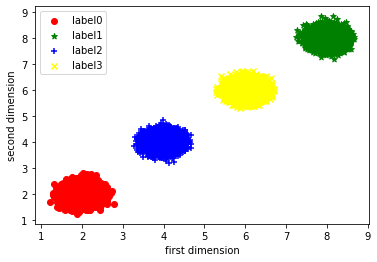

In [6]:
# plot clusted data
estimator = KMeans(n_clusters=4)
estimator.fit(X)  # cluster
label_pred = estimator.labels_  # get labels
# plot result
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
x3 = X[label_pred == 3]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')  
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')  
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')  
plt.scatter(x3[:, 0], x3[:, 1], c="yellow", marker='x', label='label3')  
plt.xlabel('first dimension')  
plt.ylabel('second dimension')  
plt.legend(loc=2)  
plt.show() 